# Credit Card Fraud Detection

## Table of Contents

1. [Library Management](#header1_1)
2. [Data Sourcing](#header1_2)
3. [Data Cleaning](#header1_3)
4. [Univariate / Bivariate Analysis](#header1_4)
5. [Data Preprocesing for Modelling](#header1_5)
6. [Data Modelling on Sampled Data](#header1_6)
    - 1. Logistic Regression
    - 2. Decision Trees
    - 3. Random Forest
    - 4. Gradient Boosting
    - 5. XG-Boost
7. [Random Oversampling](#header1_7)
    - 1. Logistic Regression
    - 2. Decision Trees
    - 3. Random Forest
    - 4. Gradient Boosting
    - 5. XG-Boost
8. [Uniform Oversampling](#header1_8)
    - 1. Logistic Regression
    - 2. Decision Trees
    - 3. Random Forest
    - 4. Gradient Boosting
    - 5. XG-Boost
9. [Synthetic Minority Oversampling Technique (SMOTE)](#header1_9)
    - 1. Logistic Regression
    - 2. Decision Trees
    - 3. Random Forest
    - 4. Gradient Boosting
    - 5. XG-Boost
10. [Adaptive Synthetic (ADASYNC)](#header1_10)
    - 1. Logistic Regression
    - 2. Decision Trees
    - 3. Random Forest
    - 4. Gradient Boosting
    - 5. XG-Boost
11. [Final Evaluation Metrics](#header1_11)

# 1. <a id="header1_1">Library Management</a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tabulate==0.8.9

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [4]:
sns.set(rc={'figure.figsize':(15,8)})

In [5]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
# from sklearn.metrics import r2_score

# 2. <a id="header1_2">Data Sourcing</a>

In [6]:
input_file_path = '../data/creditcard.csv'

In [7]:
raw_data = pd.read_csv(input_file_path)

In [8]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 3. <a id = "header1_3">Data Cleaning</a>

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### From the above information, we can say that, there is no need for data cleansing as there are no null / empty / missing values.

#### Furthermore, we can proceed ahead towards variable analysis

# 4. <a id = "header1_4">Univariate / Bivariate Analysis</a>

## 4.1. Pre-Defined Fucntions for Univariate / Bivariate analysis

In [10]:
def plot_bar_graph_from_series(series, plot_title, x_axis_label, y_axis_label, x_axis_label_rotation=0, y_axis_label_rotation=0, data_label_rotation='vertical'):
    """
    Plots the Bar Graph with appropriate X / Y axis labels, graph title and data labels.
    Arguments:
    - series: Accepts pandas series or a column from pandas dataframe
    - plot_title: Title to be diaplyed for graph
    - x-axis label: Label to be displayed on X-Axis
    - y-axis label: Label to be displayed on Y-Axis
    - x_axis_label_rotation: Angle at which x-axis labels needs to be rotated
    - y_axis_label_rotation: Angle at which y-axis labels needs to be rotated
    - data_label_rotation: Angle at which data labels (above the bar) needs to be rotated    
    
    """
    graph = sns.barplot(x=series.index, y=series.values)
    plt.title(plot_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label, fontdict={'fontsize': 15})
    plt.ylabel(y_axis_label, fontdict={'fontsize': 15})
    graph.set_xticklabels(graph.get_xticklabels(), rotation=x_axis_label_rotation)
    graph.set_yticklabels(graph.get_yticklabels(), rotation=y_axis_label_rotation)
    label_deviation_above_y_axis = series.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label_rotation)
    plt.show()

In [11]:
def plot_box_graph(series, plot_type='box'):
    """
    This function is use to plot Box Plot for continuous numerical variable
    Arguments
    - series: Accepts pandas series or a column from pandas dataframe
    - plot_type: To plot either box plot or distribution plot
    """
    if plot_type == 'box':
        plt.figure(figsize=(16,5))
        sns.boxplot(series)
    elif plot_type == 'dist':
        plt.figure(figsize=(15,8))
        sns.distplot(raw_data.V1)
    else:
        raise ValueError('Plot type can be either a "box" (for Box Plot) or "dist" (for Distribution Plot)')
    plt.title('Distribution of ' + str(series.name), fontdict={'fontsize': 20})
    plt.xlabel(series.name, fontdict={'fontsize': 15})
    plt.show()    

In [12]:
def check_class_distribution_on_handling_outlier(series_name, quantile_val_low=0.0, quantile_val_high=1.0):
    """
    This function id used to check the distribution of class on removing outliers.
    This function calculates the class count falling in range between quantile_val_low & quantile_val_high
    Arguments
    - series_name: Name of the column on which outlier treatment is to be done
    - quantile_val_low: Lower quantile value
    - quantile_val_high: Hiher quantile value
    
    """
    class_count_on_removing_outlier = raw_data[(raw_data[series_name] >= raw_data[series_name].quantile(quantile_val_low)) & (raw_data[series_name] <= raw_data[series_name].quantile(quantile_val_high))].Class.value_counts()
    class_1_drop = (raw_class_value_dist[1] - class_count_on_removing_outlier[1])/raw_class_value_dist[1] * 100
    # print('Percentage of Class 1 values dropped after outlier treatment ==>', round(class_1_drop, 2))
    
    class_0_drop = (raw_class_value_dist[0] - class_count_on_removing_outlier[0])/raw_class_value_dist[0] * 100
    # print('Percentage of Class 0 values dropped after outlier treatment ==>', round(class_0_drop, 2))
    
    headers = ['Class', 'Raw Data\nValue Count', 'Data Values\nRETAINED after\nOutlier Treatment','Data Values\nDROPPED after\nOutlier Treatment','Percent Drop\nIn Data Values']
    table = [
        ['Class 0', str(raw_class_value_dist[0]), str(class_count_on_removing_outlier[0]), str(raw_class_value_dist[0]-class_count_on_removing_outlier[0]), str(round(class_0_drop, 2)) + " %"],
        ['Class 1', str(raw_class_value_dist[1]), str(class_count_on_removing_outlier[1]), str(raw_class_value_dist[1]-class_count_on_removing_outlier[1]), str(round(class_1_drop, 2)) + " %"]
    ]
    print(tabulate(table, headers, tablefmt="grid", colalign=("center", "center", "center", "center", "center")))

## 4.2. Class

#### While looking at the data, we see that Class column corresponds to Credit Card Fraud value. Therefore we will analyse this column first

#### Data Interpretation
1. Class 0 ==> No Fraud
2. Class 1 ==> Fraud

In [13]:
raw_class_value_dist = raw_data.Class.value_counts()
raw_class_value_dist

0    284315
1       492
Name: Class, dtype: int64

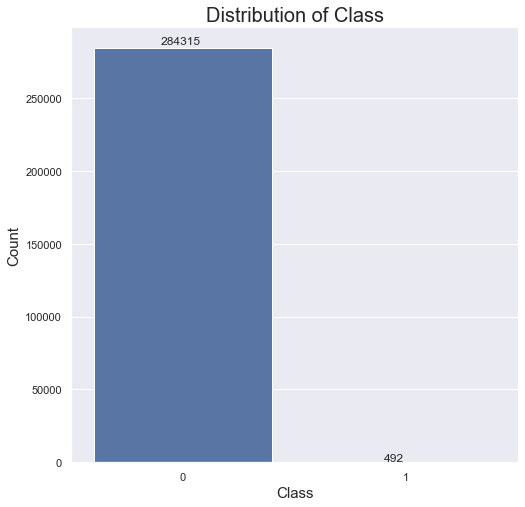

In [14]:
plt.figure(figsize=(8,8))
ax = sns.countplot(raw_data.Class)
plt.title('Distribution of Class', fontdict={'fontsize': 20})
plt.xlabel('Class', fontdict={'fontsize': 15})
plt.ylabel('Count', fontdict={'fontsize': 15})
for p, label in zip(ax.patches, raw_data.Class.value_counts().index):
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()*1.01))
plt.show()

In [15]:
headers = ['Class', 'Count', 'Percent Count']
table = [
    ['Class 0', str(raw_class_value_dist[0]), str(round(raw_class_value_dist[0]/len(raw_data)*100, 2)) + " %"],
    ['Class 1', str(raw_class_value_dist[1]), str(round(raw_class_value_dist[1]/len(raw_data)*100, 2)) + " %"]
]
print(tabulate(table, headers, tablefmt="grid", colalign=("center", "center", "center")))

+---------+---------+-----------------+
|  Class  |  Count  |  Percent Count  |
+=========+=========+=================+
| Class 0 | 284315  |     99.83 %     |
+---------+---------+-----------------+
| Class 1 |   492   |     0.17 %      |
+---------+---------+-----------------+


#### We see that there is a huge data imbalance.
#### For that, we need to drop data for outlier treatment with utmost care as the orginal datset has very less number of Class 1 values

## 4.3. Time

#### Going as per the explanation of this variable, we see that every value in this row is dependent on time between current value and value in the first row of this column.

#### This way, it makes this varaible not an independent identified variable and hence should not be consdiered for analysis.

#### Thereby, we can drop this variable

In [16]:
raw_data = raw_data.drop(columns=['Time'])

In [17]:
raw_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### We see that there is a huge data imbalance.
#### For that, we need to drop data with utmost care as the orginal datset has very less number of Class 1 values

## 4.4. Amount

In [18]:
raw_data.Amount.describe(percentiles=np.linspace(0, 1, 11))

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
0%            0.000000
10%           1.000000
20%           3.570000
30%           8.910000
40%          13.000000
50%          22.000000
60%          37.000000
70%          59.800000
80%         100.000000
90%         203.000000
100%      25691.160000
max       25691.160000
Name: Amount, dtype: float64

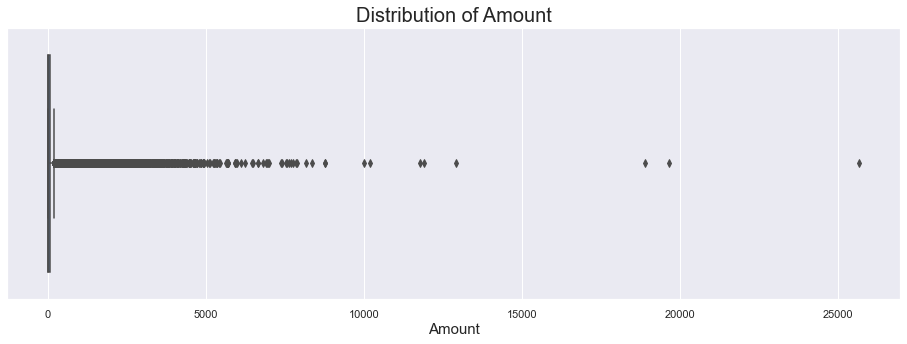

In [19]:
plot_box_graph(series=raw_data.Amount)

#### We see that there is a huge skewness in the amount column. Lets try to map this column with respect to class variable

#### Let's distribute the amount column in 10 different groups (i.e. from 0 to 10%, 10% to 20% etc)
#### After this, we can visualise if there is any pattern observed between Credit Card Fraud and Amount

In [20]:
def amount_binning(x, max_amount):
    if x <= (0.1*max_amount):
        return 'Upto 10%'
    elif x <= (0.2*max_amount):
        return '10% to 20%'
    elif x <= (0.3*max_amount):
        return '20% to 30%'
    elif x <= (0.4*max_amount):
        return '30% to 40%'
    elif x <= (0.5*max_amount):
        return '40% to 50%'
    elif x <= (0.6*max_amount):
        return '50% to 60%'
    elif x <= (0.7*max_amount):
        return '60% to 70%'
    elif x <= (0.8*max_amount):
        return '70% to 80%'
    elif x <= (0.9*max_amount):
        return '80% to 90%'
    else:
        return 'More Than 90%'

In [21]:
raw_data['Amount_Bin'] = raw_data.Amount.apply(amount_binning, args=(max(raw_data.Amount),))

In [22]:
raw_data.groupby(['Amount_Bin', 'Class']).Class.count()

Amount_Bin     Class
10% to 20%     0           360
20% to 30%     0            36
30% to 40%     0            10
40% to 50%     0             2
50% to 60%     0             1
70% to 80%     0             2
More Than 90%  0             1
Upto 10%       0        283903
               1           492
Name: Class, dtype: int64

#### Here, it is observed that all the Credit Cards Fraud that has happened are usually for smaller value. i.e. Less than 2500
#### Said that, we see a strong connectivity between Amount and Credit Card Fraud.
#### As the amount goes on increasing there is almost no chance for Credit Card Fraud

##### Thereby, we will drop the newly created column of Amount_Bin

In [23]:
raw_data = raw_data.drop(columns=['Amount_Bin'])

#### Let's check if we can do outlier treatment wherein we drop top 1% of values (i.e. 0.99 to 1.00 quantile range)

In [24]:
check_class_distribution_on_handling_outlier(series_name='Amount', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       281475        |        2840         |      1.0 %       |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         483         |          9          |      1.83 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Now, to drop these outliers is subjective matter
#### Case 1: Can be dropped ad the Class 1 values are not getting altered that much.
#### Case 2: If the outliers are removed, we might loose on a very important factor that High Amount eads to almost no Frauds. This essential bhaviour might be lost if this outliers are removed.

#### for this case, we will continue to keep the outliers

## 4.5. V1

In [25]:
raw_data.V1.describe(percentiles=np.linspace(0, 1, 11))

count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
0%      -5.640751e+01
10%     -1.893272e+00
20%     -1.134663e+00
30%     -7.472943e-01
40%     -4.267559e-01
50%      1.810880e-02
60%      1.035107e+00
70%      1.224825e+00
80%      1.694936e+00
90%      2.015409e+00
100%     2.454930e+00
max      2.454930e+00
Name: V1, dtype: float64

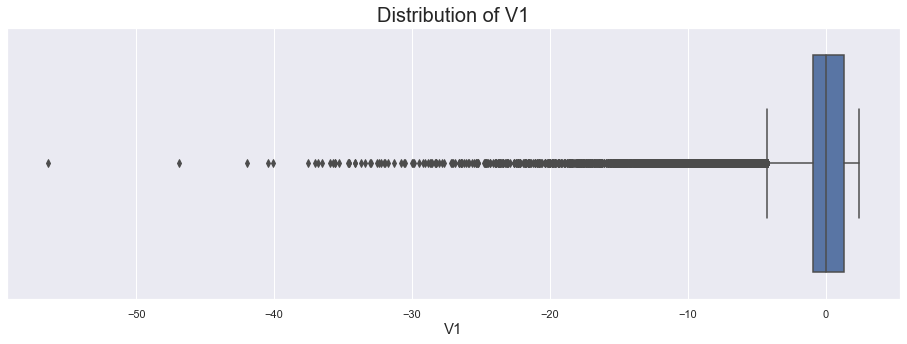

In [26]:
plot_box_graph(series=raw_data.V1)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [27]:
check_class_distribution_on_handling_outlier(series_name='V1', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       281582        |        2733         |      0.96 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         376         |         116         |     23.58 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 24% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.6. V2

In [28]:
raw_data.V2.describe(percentiles=np.linspace(0, 1, 11))

count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
0%      -7.271573e+01
10%     -1.359862e+00
20%     -7.908142e-01
30%     -4.363931e-01
40%     -1.538049e-01
50%      6.548556e-02
60%      3.027378e-01
70%      6.368450e-01
80%      9.573136e-01
90%      1.326635e+00
100%     2.205773e+01
max      2.205773e+01
Name: V2, dtype: float64

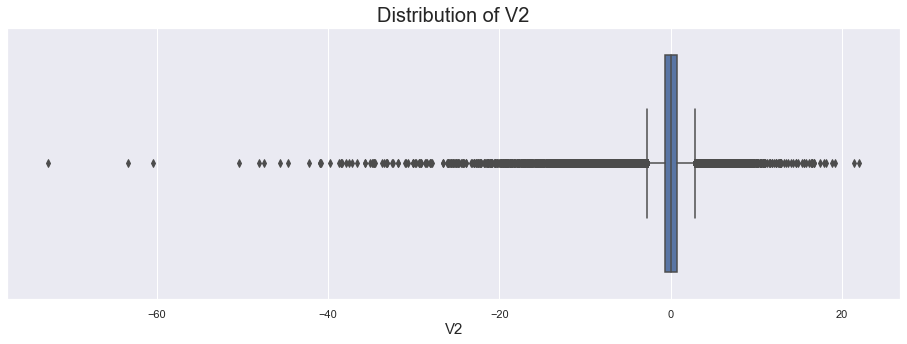

In [29]:
plot_box_graph(series=raw_data.V2)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [30]:
check_class_distribution_on_handling_outlier(series_name='V2', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       281472        |        2843         |      1.0 %       |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         486         |          6          |      1.22 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 1.2%
#### Therefore we can drop these values

In [31]:
raw_data = raw_data[
    (raw_data['V2'] >= raw_data['V2'].quantile(0.01)) & 
    (raw_data['V2'] <= raw_data['V2'].quantile(1.00))
]

## 4.7. V3

In [32]:
raw_data.V3.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean          0.018062
std           1.476742
min         -33.680984
0%          -33.680984
10%          -1.781283
20%          -1.150780
30%          -0.600779
40%          -0.187586
50%           0.186050
60%           0.501966
70%           0.847060
80%           1.217419
90%           1.676386
100%          9.382558
max           9.382558
Name: V3, dtype: float64

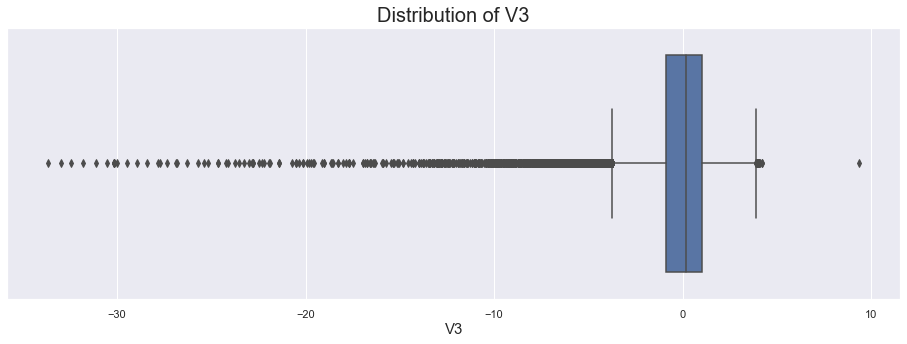

In [33]:
plot_box_graph(series=raw_data.V3)

#### In the above graph, we see that the graph is slightly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [34]:
check_class_distribution_on_handling_outlier(series_name='V3', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278963        |        5352         |      1.88 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         175         |         317         |     64.43 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 64% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.8. V4

In [35]:
raw_data.V4.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.017614
std           1.391189
min          -5.683171
0%           -5.683171
10%          -1.661756
20%          -1.073008
30%          -0.702556
40%          -0.403770
50%          -0.029077
60%           0.275276
70%           0.547546
80%           0.967564
90%           1.455796
100%         12.114672
max          12.114672
Name: V4, dtype: float64

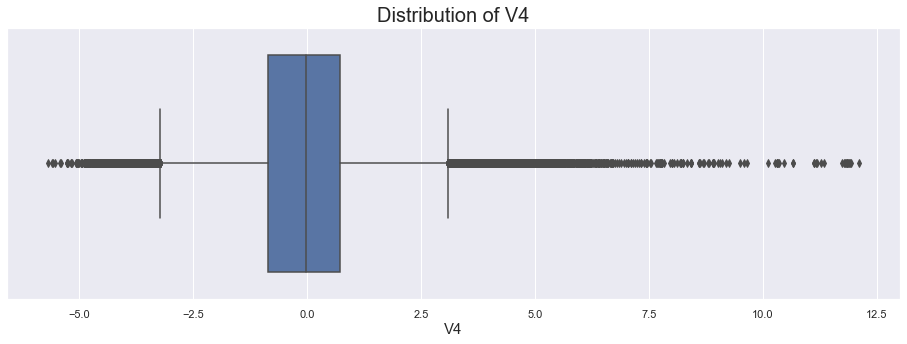

In [36]:
plot_box_graph(series=raw_data.V4)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.9. V5

In [37]:
raw_data.V5.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.009766
std           1.224929
min         -31.356750
0%          -31.356750
10%          -1.283888
20%          -0.851292
30%          -0.540402
40%          -0.288567
50%          -0.054945
60%           0.184108
70%           0.451687
80%           0.790224
90%           1.374734
100%         21.120137
max          21.120137
Name: V5, dtype: float64

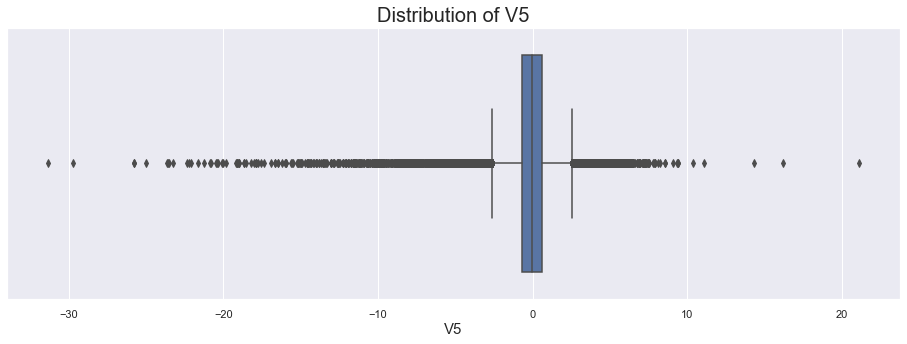

In [38]:
plot_box_graph(series=raw_data.V5)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.10. V6

In [39]:
raw_data.V6.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean          0.009256
std           1.269325
min         -14.352986
0%          -14.352986
10%          -1.156930
20%          -0.872516
30%          -0.664461
40%          -0.477251
50%          -0.273448
60%          -0.048993
70%           0.220781
80%           0.623665
90%           1.494456
100%         21.307738
max          21.307738
Name: V6, dtype: float64

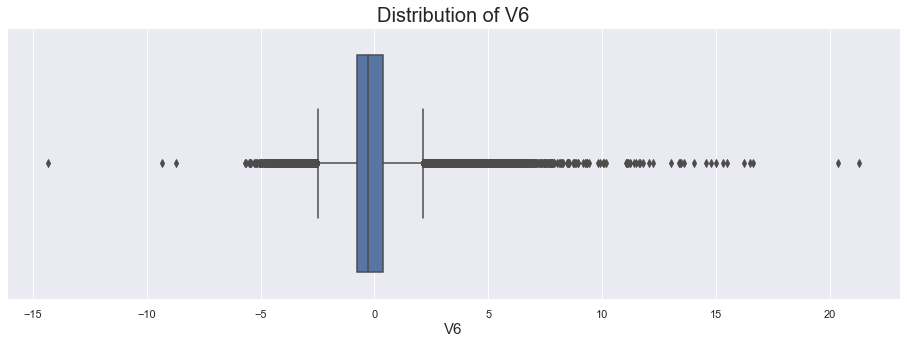

In [40]:
plot_box_graph(series=raw_data.V6)

#### In the above graph, we see that the graph is highly skewed towards right side (i.e. Positive Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [41]:
check_class_distribution_on_handling_outlier(series_name='V6', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278660        |        5655         |      1.99 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         478         |         14          |      2.85 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by more than 2% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.11. V7

In [42]:
raw_data.V7.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.003810
std           1.102978
min         -43.557242
0%          -43.557242
10%          -1.065370
20%          -0.678002
30%          -0.423122
40%          -0.159015
50%           0.039027
60%           0.210665
70%           0.440632
80%           0.689830
90%           1.024571
100%         31.527244
max          31.527244
Name: V7, dtype: float64

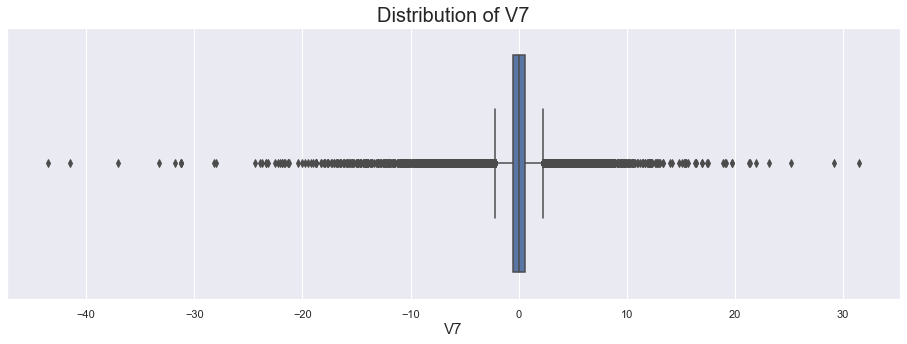

In [43]:
plot_box_graph(series=raw_data.V7)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.12. V8

In [44]:
raw_data.V8.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean          0.004173
std           1.186765
min         -73.216718
0%          -73.216718
10%          -0.449687
20%          -0.262673
30%          -0.156123
40%          -0.064929
50%           0.022912
60%           0.120533
70%           0.242603
80%           0.433234
90%           0.765809
100%         20.007208
max          20.007208
Name: V8, dtype: float64

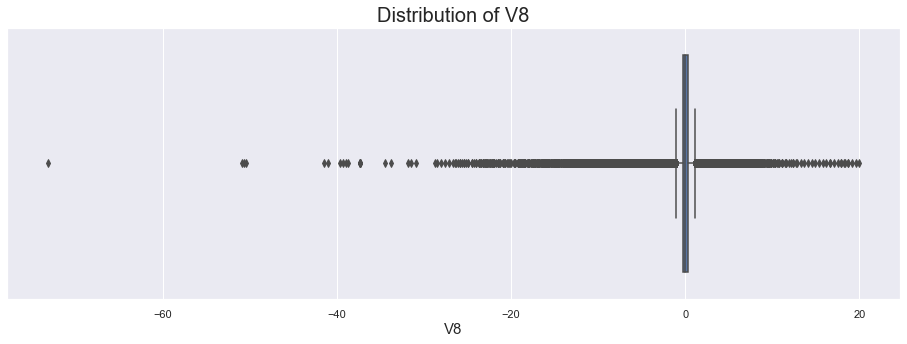

In [45]:
plot_box_graph(series=raw_data.V8)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [46]:
check_class_distribution_on_handling_outlier(series_name='V8', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278684        |        5631         |      1.98 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         454         |         38          |      7.72 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by more than 7% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.13. V9

In [47]:
raw_data.V9.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.002642
std           1.090891
min         -13.434066
0%          -13.434066
10%          -1.289818
20%          -0.806352
30%          -0.501160
40%          -0.257620
50%          -0.052279
60%           0.174089
70%           0.442611
80%           0.786784
90%           1.293297
100%         15.594995
max          15.594995
Name: V9, dtype: float64

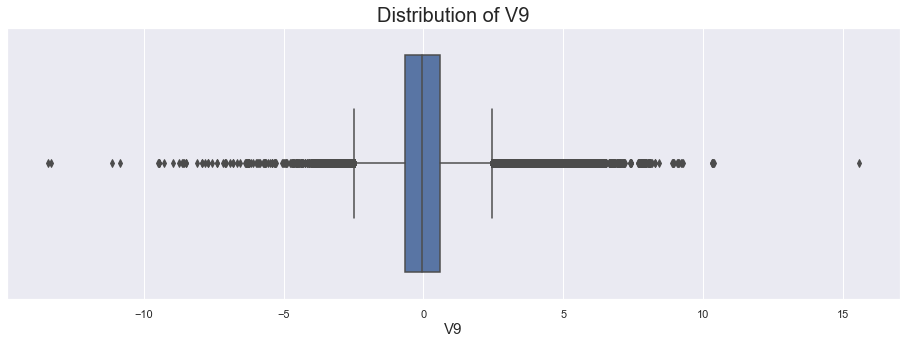

In [48]:
plot_box_graph(series=raw_data.V9)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.14. V10

In [49]:
raw_data.V10.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.000272
std           1.079361
min         -24.588262
0%          -24.588262
10%          -1.026294
20%          -0.662930
30%          -0.424250
40%          -0.247449
50%          -0.092997
60%           0.058647
70%           0.267108
80%           0.644882
90%           1.110393
100%         23.745136
max          23.745136
Name: V10, dtype: float64

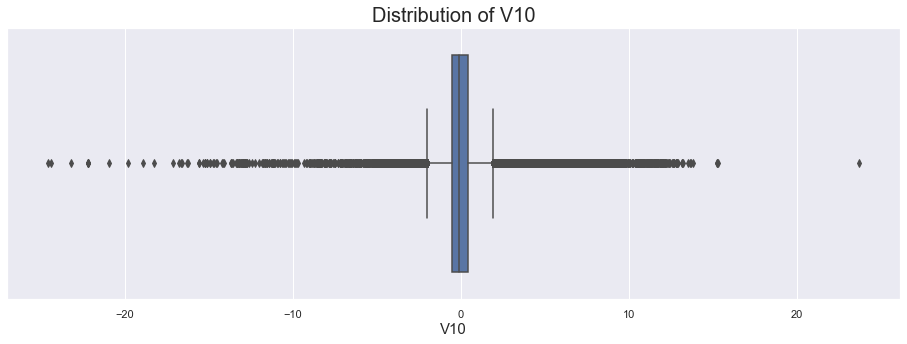

In [50]:
plot_box_graph(series=raw_data.V10)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### Let's calculate the number of minority class instances that would have been reduced on removing outliers

In [51]:
check_class_distribution_on_handling_outlier(series_name='V10', quantile_val_low=0.00, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278654        |        5661         |      1.99 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         484         |          8          |      1.63 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by less than 2%
#### Therefore we can drop these values

In [52]:
raw_data = raw_data[
    (raw_data['V10'] >= raw_data['V10'].quantile(0.0)) & 
    (raw_data['V10'] <= raw_data['V10'].quantile(0.99))
]